<IPython.core.display.Javascript object>


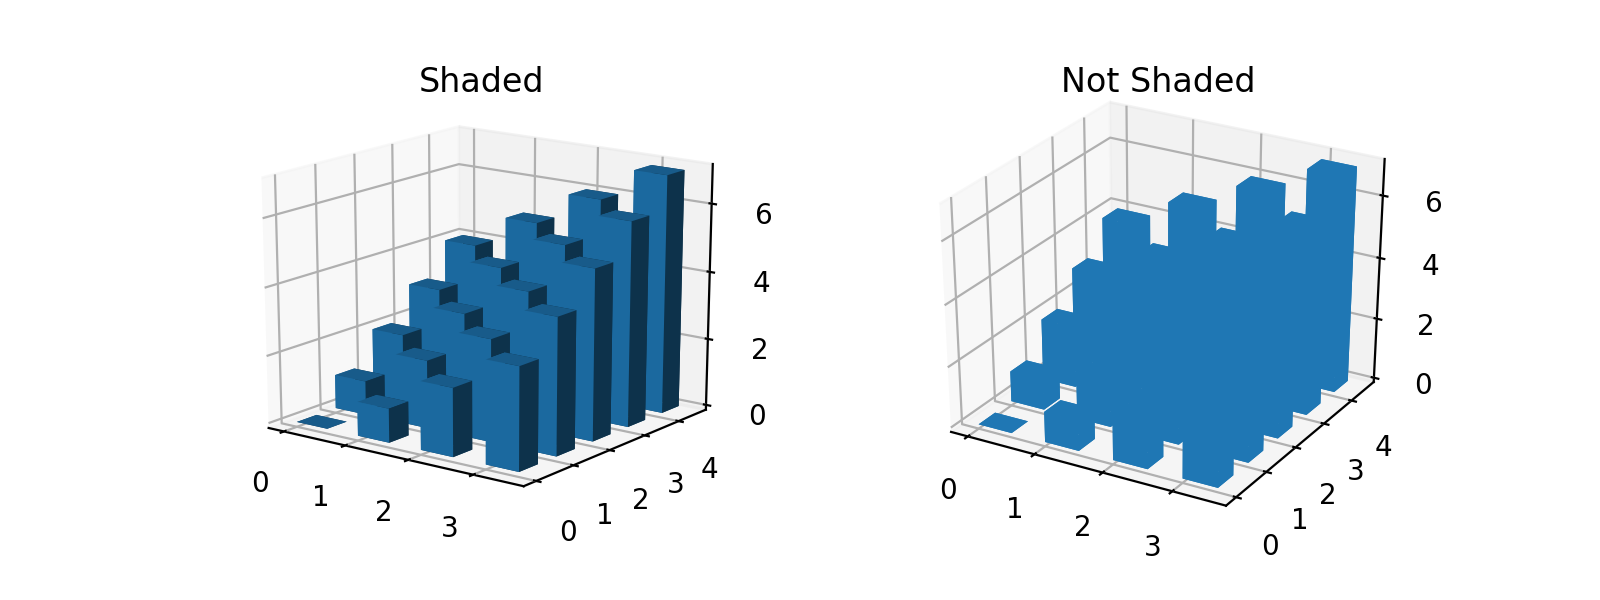

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# setup the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1/2

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

plt.show()

In [2]:
from results_run_xps_1M_DOF import *

In [3]:
plot1 = [real,mdnum1,mdnum2,mdnum3,mdnum4,mdnum5]
plot1n= ['real','dual','bidual','tridual','tetradual','pentadual']

plotm1 = [real,onumm1n1,onumm1n2,onumm1n3,onumm1n4,onumm1n5]
plotm1n= ['real','om1n1', 'om1n2', 'om1n3', 'om1n4', 'om1n5']

plotm2 = [real,onumm2n1,onumm2n2,onumm2n3,onumm2n4,onumm2n5]
plotm2n= ['real','om2n1', 'om2n2', 'om2n3', 'om2n4', 'om2n5']

plotm3 = [real,onumm3n1, onumm3n2,onumm3n3,onumm3n4,onumm3n5]
plotm3n= ['real','om3n1',  'om3n2', 'om3n3', 'om3n4', 'om3n5']

plotm4 = [real,onumm4n1,onumm4n2,onumm4n3,onumm4n4,onumm4n5]
plotm4n= ['real','om4n1', 'om4n2', 'om4n3', 'om4n4', 'om4n5']

plotm5 = [real,onumm5n1,onumm5n2,onumm5n3,onumm5n4,onumm5n5]
plotm5n= ['real','om5n1', 'om5n2', 'om5n3', 'om5n4', 'om5n5']

In [4]:
globals().keys()


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'np', 'plt', 'Axes3D', 'fig', 'ax1', 'ax2', '_x', '_y', '_xx', '_yy', 'x', 'y', 'top', 'bottom', 'width', 'depth', '_i2', 'real', 'eval_time', 'mdnum1', 'mdnum2', 'mdnum3', 'mdnum4', 'mdnum5', 'onumm1n1', 'onumm1n2', 'onumm1n3', 'onumm1n4', 'onumm1n5', 'onumm10n1', 'onumm10n2', 'onumm2n1', 'onumm2n2', 'onumm2n3', 'onumm2n4', 'onumm2n5', 'onumm3n1', 'onumm3n2', 'onumm3n3', 'onumm3n4', 'onumm3n5', 'onumm4n1', 'onumm4n2', 'onumm4n3', 'onumm4n4', 'onumm4n5', 'onumm5n1', 'onumm5n2', 'onumm5n3', 'onumm5n4', 'onumm5n5', 'onumm1n10', '_i3', 'plot1', 'plot1n', 'plotm1', 'plotm1n', 'plotm2', 'plotm2n', 'plotm3', 'plotm3n', 'plotm4', 'plotm4n', 'plotm5', 'plotm5n', '_i4'])

In [48]:
mdnum1.keys()

dict_keys(['assembly', 'boundary', 'solution', 'total'])

In [6]:

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        y = rect.get_y()
        plt.annotate('{0:.2f}x'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, y+height/2),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
def autolabel_top(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        y = rect.get_y()
        plt.annotate('{0:.2f}x'.format(y+height),
                    xy=(rect.get_x() + rect.get_width() / 2, y+height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
    

<IPython.core.display.Javascript object>


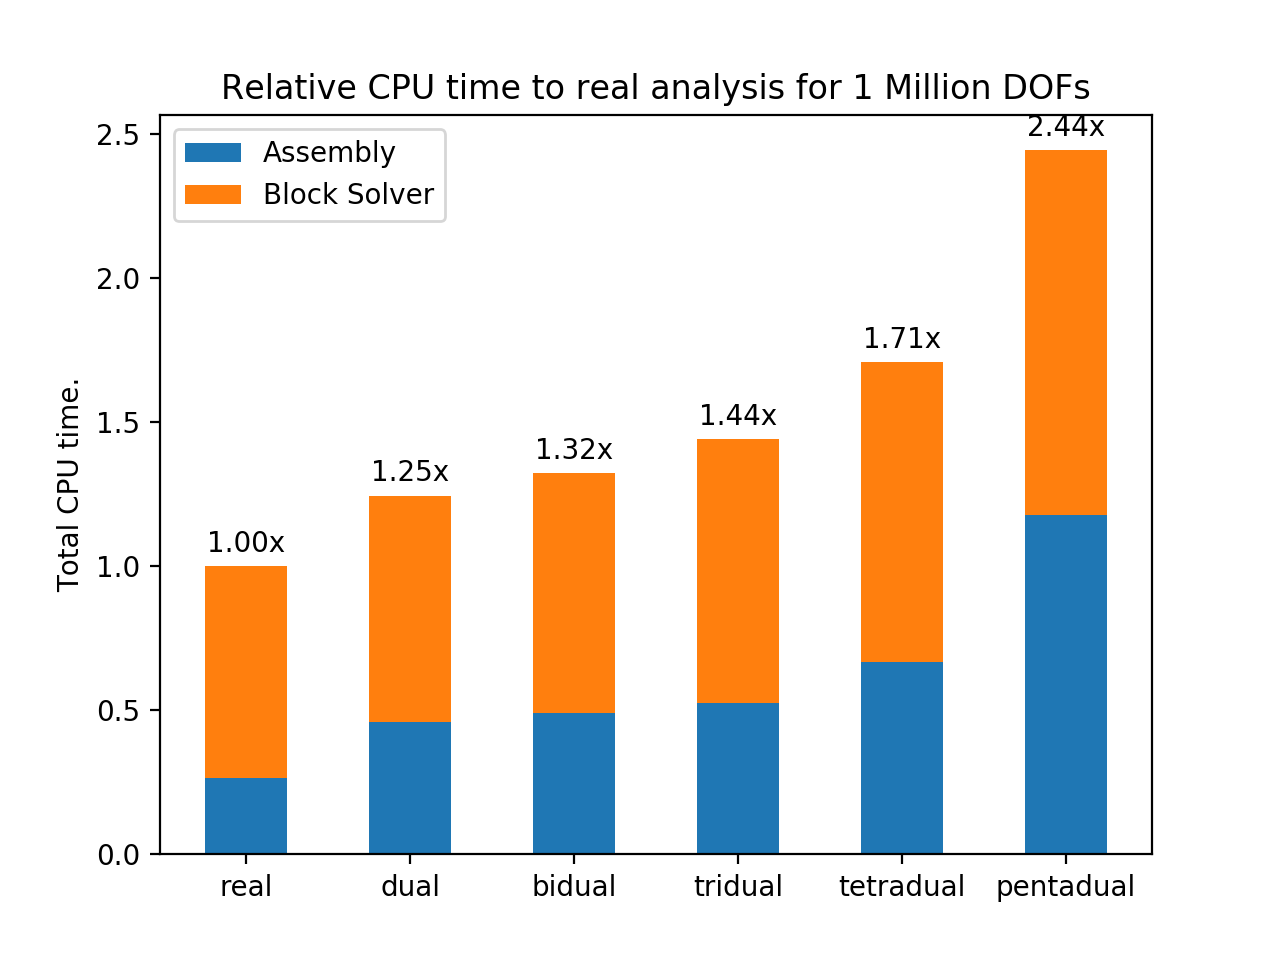

In [7]:
to_plot = plot1
to_plotn= plot1n
assembly = np.zeros(len(to_plot))
boundary = np.zeros(len(to_plot))
solution = np.zeros(len(to_plot))
total    = np.zeros(len(to_plot))

for i in range(len(to_plot)):
    assembly[i] = to_plot[i]['assembly']
    boundary[i] = to_plot[i]['boundary']
    solution[i] = to_plot[i]['solution']
    total[i]    = to_plot[i]['total']
# end for 

plt.figure()

assem_plt = plt.bar(to_plotn,(boundary+assembly)/total[0],                         width=0.5, label='Assembly')
block_plt = plt.bar(to_plotn,solution/total[0],bottom=(boundary+assembly)/total[0],width=0.5, label='Block Solver')

# autolabel(assem_plt)
# autolabel(block_plt)
autolabel_top(block_plt)
plt.legend()


plt.title("Relative CPU time to real analysis for 1 Million DOFs")
plt.ylabel("Total CPU time.")
plt.show()



<IPython.core.display.Javascript object>


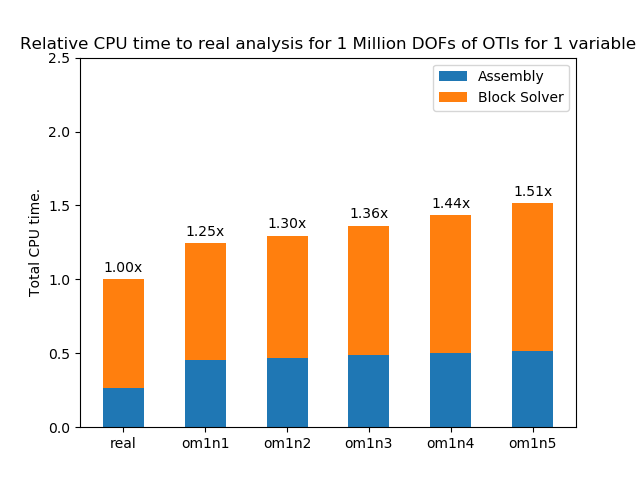

In [11]:
to_plot = plotm1
to_plotn= plotm1n
assembly = np.zeros(len(to_plot))
boundary = np.zeros(len(to_plot))
solution = np.zeros(len(to_plot))
total    = np.zeros(len(to_plot))

for i in range(len(to_plot)):
    assembly[i] = to_plot[i]['assembly']
    boundary[i] = to_plot[i]['boundary']
    solution[i] = to_plot[i]['solution']
    total[i]    = to_plot[i]['total']
# end for 

plt.figure()
val1 = (boundary+assembly)/total[0]
val2 = solution/total[0]
assem_plt = plt.bar(to_plotn,val1,              width=0.5,  label='Assembly'     )
block_plt = plt.bar(to_plotn,val2, bottom=val1, width=0.5,  label='Block Solver' )

# autolabel(assem_plt)
# autolabel(block_plt)
autolabel_top(block_plt)
plt.legend()


plt.title("Relative CPU time to real analysis for 1 Million DOFs of OTIs for 1 variable")
plt.ylabel("Total CPU time.")
plt.axis([None, None, None,2.5])
plt.show()

<IPython.core.display.Javascript object>


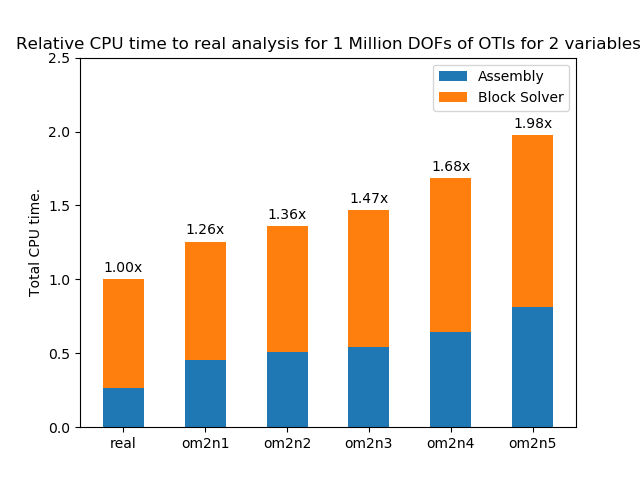

In [12]:
to_plot = plotm2
to_plotn= plotm2n
assembly = np.zeros(len(to_plot))
boundary = np.zeros(len(to_plot))
solution = np.zeros(len(to_plot))
total    = np.zeros(len(to_plot))

for i in range(len(to_plot)):
    assembly[i] = to_plot[i]['assembly']
    boundary[i] = to_plot[i]['boundary']
    solution[i] = to_plot[i]['solution']
    total[i]    = to_plot[i]['total']
# end for 

plt.figure()
val1 = (boundary+assembly)/total[0]
val2 = solution/total[0]
assem_plt = plt.bar(to_plotn,val1,              width=0.5,  label='Assembly'     )
block_plt = plt.bar(to_plotn,val2, bottom=val1, width=0.5,  label='Block Solver' )

# autolabel(assem_plt)
# autolabel(block_plt)
autolabel_top(block_plt)
plt.legend()


plt.title("Relative CPU time to real analysis for 1 Million DOFs of OTIs for 2 variables")
plt.ylabel("Total CPU time.")
plt.axis([None, None, None,2.5])
plt.show()

<IPython.core.display.Javascript object>


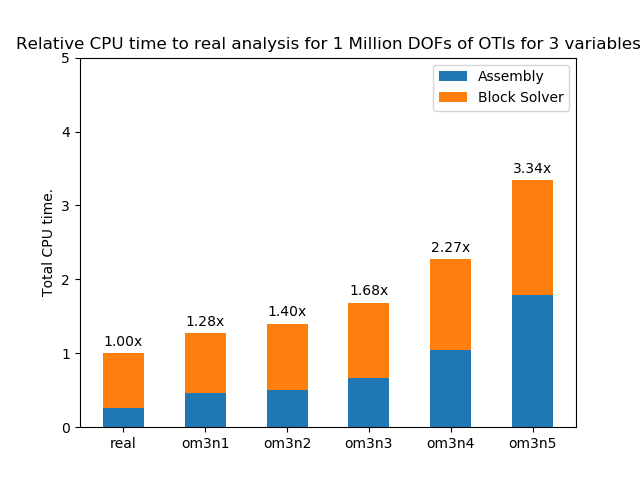

In [16]:
to_plot = plotm3
to_plotn= plotm3n
assembly = np.zeros(len(to_plot))
boundary = np.zeros(len(to_plot))
solution = np.zeros(len(to_plot))
total    = np.zeros(len(to_plot))

for i in range(len(to_plot)):
    assembly[i] = to_plot[i]['assembly']
    boundary[i] = to_plot[i]['boundary']
    solution[i] = to_plot[i]['solution']
    total[i]    = to_plot[i]['total']
# end for 

plt.figure()
val1 = (boundary+assembly)/total[0]
val2 = solution/total[0]
assem_plt = plt.bar(to_plotn,val1,              width=0.5,  label='Assembly'     )
block_plt = plt.bar(to_plotn,val2, bottom=val1, width=0.5,  label='Block Solver' )

# autolabel(assem_plt)
# autolabel(block_plt)
autolabel_top(block_plt)
plt.legend()


plt.title("Relative CPU time to real analysis for 1 Million DOFs of OTIs for 3 variables")
plt.ylabel("Total CPU time.")
plt.axis([None, None, None,5])
plt.show()

<IPython.core.display.Javascript object>


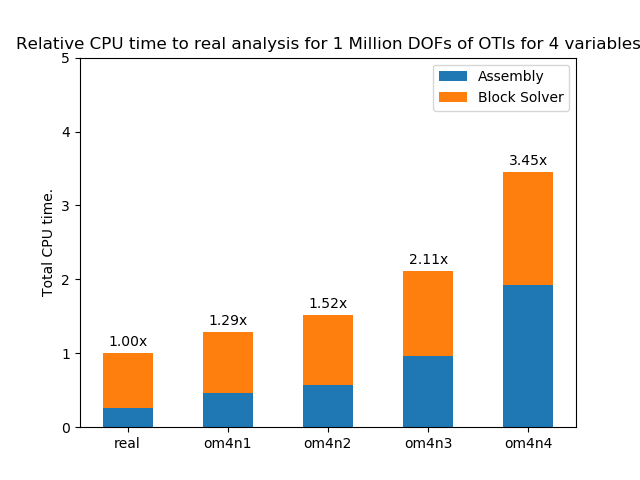

In [17]:
to_plot = plotm4
to_plotn= plotm4n
assembly = np.zeros(len(to_plot))
boundary = np.zeros(len(to_plot))
solution = np.zeros(len(to_plot))
total    = np.zeros(len(to_plot))

for i in range(len(to_plot)):
    assembly[i] = to_plot[i]['assembly']
    boundary[i] = to_plot[i]['boundary']
    solution[i] = to_plot[i]['solution']
    total[i]    = to_plot[i]['total']
# end for 

plt.figure()
val1 = (boundary+assembly)/total[0]
val2 = solution/total[0]
assem_plt = plt.bar(to_plotn,val1,              width=0.5,  label='Assembly'     )
block_plt = plt.bar(to_plotn,val2, bottom=val1, width=0.5,  label='Block Solver' )

# autolabel(assem_plt)
# autolabel(block_plt)
autolabel_top(block_plt)
plt.legend()


plt.title("Relative CPU time to real analysis for 1 Million DOFs of OTIs for 4 variables")
plt.ylabel("Total CPU time.")
plt.axis([None, None, None,5])
plt.show()

<IPython.core.display.Javascript object>


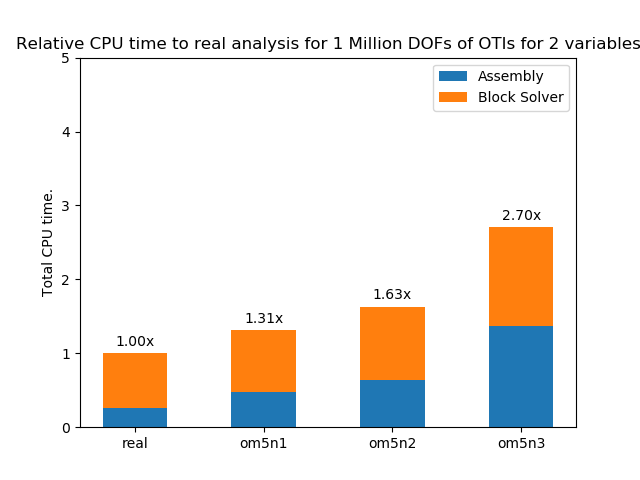

In [18]:
to_plot = plotm5
to_plotn= plotm5n
assembly = np.zeros(len(to_plot))
boundary = np.zeros(len(to_plot))
solution = np.zeros(len(to_plot))
total    = np.zeros(len(to_plot))

for i in range(len(to_plot)):
    assembly[i] = to_plot[i]['assembly']
    boundary[i] = to_plot[i]['boundary']
    solution[i] = to_plot[i]['solution']
    total[i]    = to_plot[i]['total']
# end for 

plt.figure()
val1 = (boundary+assembly)/total[0]
val2 = solution/total[0]
assem_plt = plt.bar(to_plotn,val1,              width=0.5,  label='Assembly'     )
block_plt = plt.bar(to_plotn,val2, bottom=val1, width=0.5,  label='Block Solver' )

# autolabel(assem_plt)
# autolabel(block_plt)
autolabel_top(block_plt)
plt.legend()


plt.title("Relative CPU time to real analysis for 1 Million DOFs of OTIs for 2 variables")
plt.ylabel("Total CPU time.")
plt.axis([None, None, None,5])
plt.show()

<IPython.core.display.Javascript object>


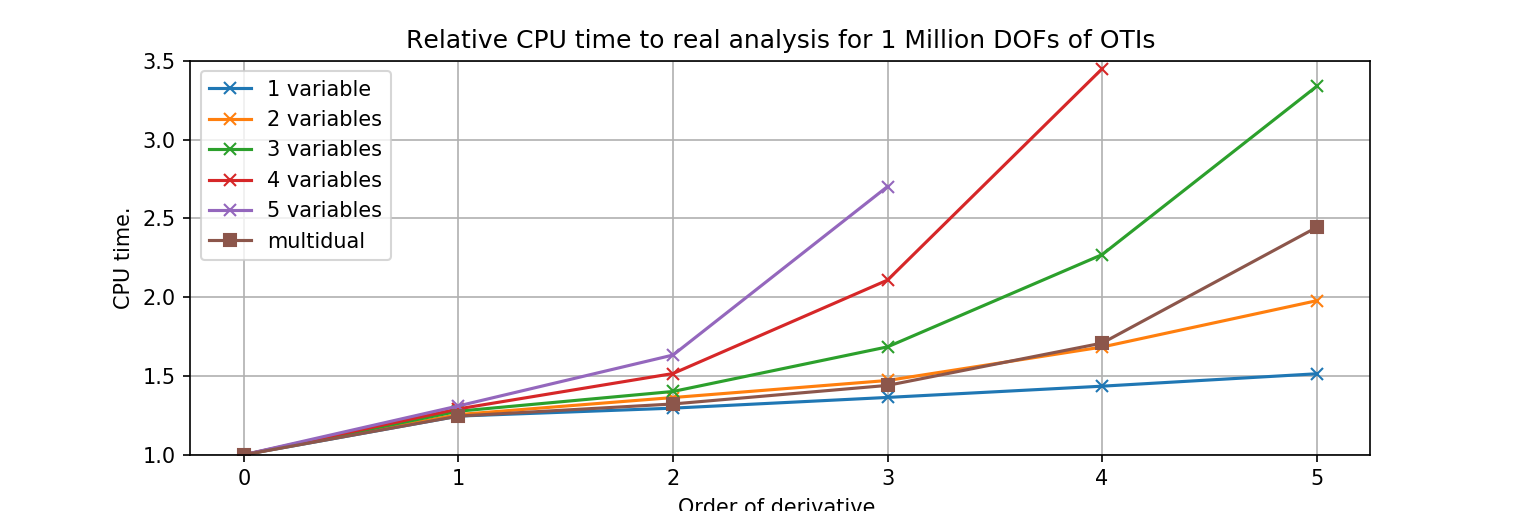

In [29]:
to_plot = plotm2
to_plotn= plotm2n
assembly = np.zeros(len(to_plot))
boundary = np.zeros(len(to_plot))
solution = np.zeros(len(to_plot))
total    = np.zeros(len(to_plot))
x = range(len(to_plot))


plt.figure()

to_plot = plotm1
for i in range(len(to_plot)):
    total[i]    = to_plot[i]['total']
# end for 
val2 = total/total[0]
plt.plot(val2, 'x-',label='1 variable ' )

to_plot = plotm2
for i in range(len(to_plot)):
    total[i]    = to_plot[i]['total']
# end for 
val2 = total/total[0]
plt.plot(val2,'x-', label='2 variables' )

to_plot = plotm3
for i in range(len(to_plot)):
    total[i]    = to_plot[i]['total']
# end for 
val2 = total/total[0]
plt.plot(val2,'x-', label='3 variables' )

to_plot = plotm4
for i in range(len(to_plot)):
    total[i]    = to_plot[i]['total']
# end for 
val2 = total/total[0]
plt.plot(val2,'x-', label='4 variables' )

to_plot = plotm5
for i in range(len(to_plot)):
    total[i]    = to_plot[i]['total']
# end for 
val2 = total/total[0]
plt.plot(val2,'x-', label='5 variables' )

to_plot = plot1
for i in range(len(to_plot)):
    total[i]    = to_plot[i]['total']
# end for 
val2 = total/total[0]
plt.plot(val2,'s-', label='multidual' )

# autolabel(assem_plt)
# autolabel(block_plt)
plt.legend()

# labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

# plt.plot(x, y, 'ro')
# # You can specify a rotation for the tick labels in degrees or with keywords.
# plt.xticks(x, labels, rotation='vertical')
# # Pad margins so that markers don't get clipped by the axes
# plt.margins(0.2)
# # Tweak spacing to prevent clipping of tick-labels
# plt.subplots_adjust(bottom=0.15)

plt.title("Relative CPU time to real analysis for 1 Million DOFs of OTIs")
plt.ylabel("CPU time.")
plt.xlabel("Order of derivative.")
plt.axis([None, None, 1,3.5])
plt.grid()
plt.show()

In [30]:
real

{'assembly': 24.585664,
 'boundary': 0.014931,
 'solution': 68.401785,
 'total': 93.00238}

In [31]:
mdnum2

{'assembly': 45.466606,
 'boundary': 0.033116,
 'solution': 77.474226,
 'total': 122.973948}

In [32]:
45.466606*3+0.033116*3+68.401785+(77.474226-68.401785)*3

232.11827399999996

In [33]:
232.11/93.002

2.495752779510118